In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [10]:
def y(n):
    if(n >= 1):
        return y(n/2.0) + 1.0
    return 0



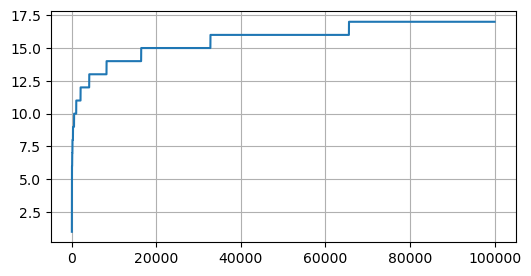

In [11]:
n = np.arange(1.0, 100000.0, 1, dtype=float)
x = np.array([y(ni) for ni in n])

plt.rcParams['figure.figsize'] = [6, 3]
fig, ax = plt.subplots()
ax.plot(n, x)
ax.grid(True)
plt.show()

A) Error=1.608967e+07
B) Error=7.080302e+06
C) Error=7.650892e+03
D) Error=1.004825e+07
E) Error=9.722834e+06
F) Error=2.211368e+05
Best: C


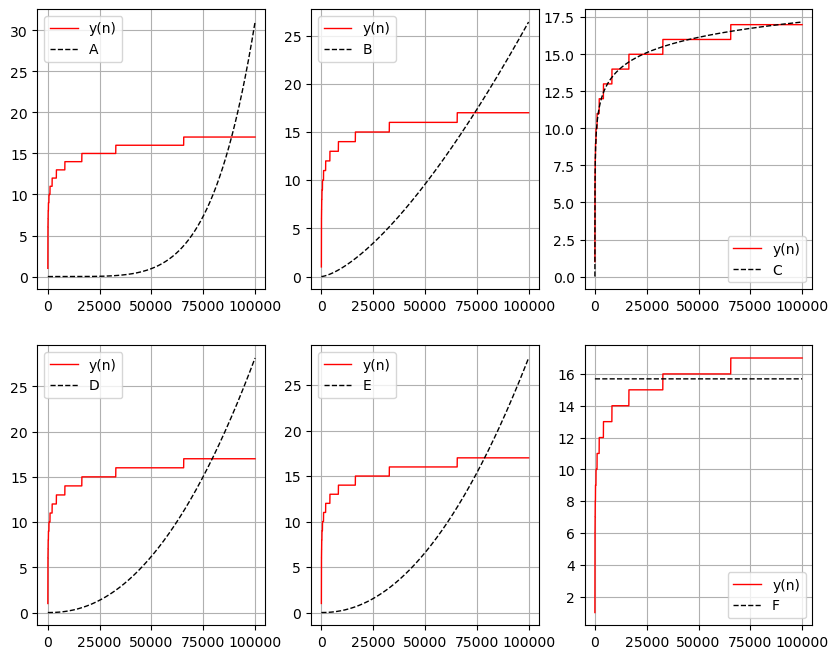

In [12]:
def A(n, c):
    return c * (n**5)

def B(n, c):
    return c * (n**np.emath.logn(3.0, 5.0))

def C(n, c):
    return c * np.log(n)

def D(n, c):
    return c * (n**2) * (np.log(n)**2)

def E(n, c):
    return c * (n**2) * np.log(n)

def F(n, c):
    return c * 1.0

functions = [A,B,C,D,E,F]
names = ["A", "B", "C", "D", "E", "F"]

plt.rcParams['figure.figsize'] = [10, 8]
fig, axs_2d = plt.subplots(nrows=2, ncols=3)

axs = axs_2d.flatten()

best_fit_error = None
best_fit_idx = None

for i, Y in enumerate(functions):

    opt, cov = curve_fit(Y, n, x)
    c = opt[0]

    x_fit = np.array([Y(ni, c) for ni in n])

    ax = axs[i]
    ax.plot(n, x, lw=1, label="y(n)", color="red")
    ax.plot(n, x_fit, lw=1, label=names[i], color="black", ls="--")
    ax.grid(True)
    ax.legend()

    error = np.sum(np.square(x_fit-x))

    if(best_fit_idx is None or error < best_fit_error):
        best_fit_error = error
        best_fit_idx = i

    print(f"{names[i]}) Error={error:e}")

print(f"Best: {names[best_fit_idx]}")

plt.show()
